<AxesSubplot:xlabel='len'>

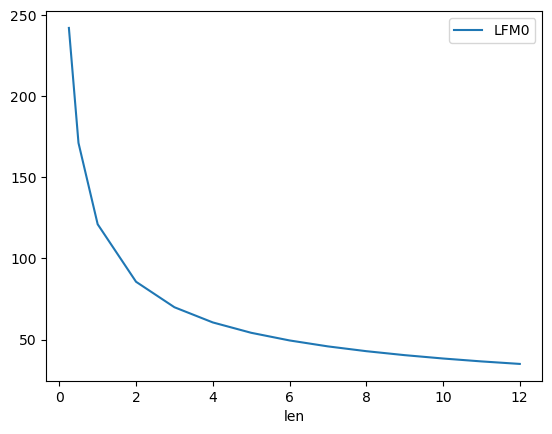

In [26]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot

df = pd.read_csv('data/len_vs_lfm.csv')

df.plot.line(x='len', y='LFM0')

In [41]:
# define the true objective function
def objective0(x, a, b, c):
	return (a / (x+b)) + c

x = df['len']
y = df['LFM0']

popt, pcov = curve_fit(objective0, x, y)

a, b, c = popt

0      0.25
1      0.50
2      1.00
3      2.00
4      3.00
5      4.00
6      5.00
7      6.00
8      7.00
9      8.00
10     9.00
11    10.00
12    11.00
13    12.00
Name: len, dtype: float64


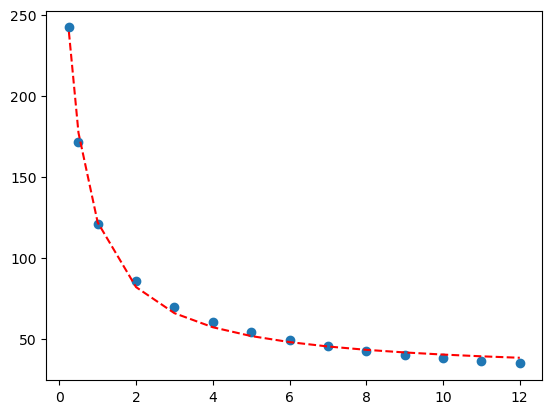

In [39]:
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs

y_line = objective0(x, a, b, c)

# create a line plot for the mapping function
pyplot.plot(x, y_line, '--', color='red')
pyplot.show()